In [1]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import copy as cp
import matplotlib.gridspec as gridspec
from matplotlib.patches import Polygon

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray  import *
from sub_fesom_mesh  import * 
from sub_fesom_data  import * 
from sub_fesom_plot  import *
from sub_fesom_selectbox 	import *
from sub_regriding_adapt 	import *
from colormap_c2c    import *


In [2]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM MESH ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray=set_inputarray()
inputarray['save_fig'        ] = False
inputarray['save_figpath'    ] = '/home/ollie/pscholz/figures/poster_TRR181_winterschool/'
inputarray['mesh_id'],inputarray['mesh_dir'] = 'COREv2','/work/ollie/pscholz/mesh_fesom2.0/core2_meanz/'
try:
	mesh
except NameError:
    mesh = fesom_init_mesh(inputarray)
    mesh.fesom_calc_landmask()
else:
    if mesh.id!=inputarray['mesh_id']:
        mesh = fesom_init_mesh(inputarray)
        mesh.fesom_calc_landmask()
    else:
        print(' --> ___FOUND {} FESOM MESH --> will use it!___________________________'.format(mesh.id))   


___LOAD FESOM MESH COREv2_________________________________________
 --> read grid files
     > nod2d.out  : #2dn=126858
     > elem2d.out : #2de=244659
     > aux3d.out
     > nlvls.out
     > elvls.out
 --> rotate mesh rot2geo
 --> remove cyclic boundary
_______________________________________________________________
 --> calc landmask contourline


In [36]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** SET INPUT PARAMETER ***                         |
#|                                                                             |
#+_____________________________________________________________________________+
# setup variable name, runid and data path
box 		      = fesom_box()
box.box_define    =  list([[]]) # --> more boxes ,  list([[],[],...,...]) 
# box.box_define[0] = [ [0.00, 20.00],[-65.00,  -55.00 ],'Weddel Sea' ]
box.box_define[0] = [ [-57.0, -48.0],[53.0,  62.0 ],'Lab Sea' ]
# box.box_define[0] = [ [-180, 180.00],[-90.00,  90.00 ],'globe' ]

#+_____________________________________________________________________________+
box.descript,box.path = 'parabolic','../results/new_linfs/cvmix_kpp_mom6/t11sw1_mtchparabolic/'
box.var           ='salt'
box.which_mean    = 'None'

#+_____________________________________________________________________________+
# select year to average over [start_yr, end_yr]
box.year		  = [1948,2009]

# select month to average over
box.month	      = [1,2,3,4,5,6,7,8,9,10,11,12]

# select linear interpolated depth layers to average over, empty mean use all layers
# don't touch here, should be empty !
box.depth	      = []

# exlude node points whos bottom depth is shallower than botlimit
box.botlimit      = [3000.0]

# make anomaly
# do_anomaly        = True
do_anomaly        = False
if do_anomaly==True:
    box2  = cp.deepcopy(box)
    box2.descript,box2.path = 'both' , '../results/new_linfs/cvmix_kpp_mom6/t11sw1_mtchboth/'

    
    
  

In [37]:
if len(box.box_define)==0:
	#___________________________________________________________________________
	fig, ax = plt.figure(figsize=(10, 10)), plt.gca()
	map 	= Basemap(projection = 'cyl',resolution = 'c',
				llcrnrlon = -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat = 90)
	mx,my 	= map(mesh.nodes_2d_xg, mesh.nodes_2d_yg)
	
	#___________________________________________________________________________
	tri     = Triangulation(mx, my,mesh.elem_2d_i)
	hp1		= plt.tripcolor(tri,-mesh.nodes_2d_zg)
	#hp1		=plt.tripcolor(tri,data_anom.value,cmap=cmocean.cm.balance)
	#plt.clim(-0.50,0.50)
	
	#___________________________________________________________________________
	map.drawmapboundary(fill_color='0.9',linewidth=1.0)
	# map.bluemarble(scale=0.25)
	# map.etopo()
	#fesom_plot_lmask(map,mesh,ax,'none','r')
	ax.grid(color='k', linestyle='-', linewidth=0.5)
	plt.xscale('linear')
	plt.yscale('linear')
	plt.show(block=False)
	fig.canvas.draw()
	
	#___________________________________________________________________________
	# interactively
	box._cid_pressb = fig.canvas.mpl_connect('button_press_event', box._anybutton_)
	box._cid_pressk = fig.canvas.mpl_connect('key_press_event', box._anykey_)
	box._connect_(fig,ax,map)    

 --> calculate points inside box
[[[-57.0, -48.0], [53.0, 62.0], 'Lab Sea']]


<IPython.core.display.Javascript object>


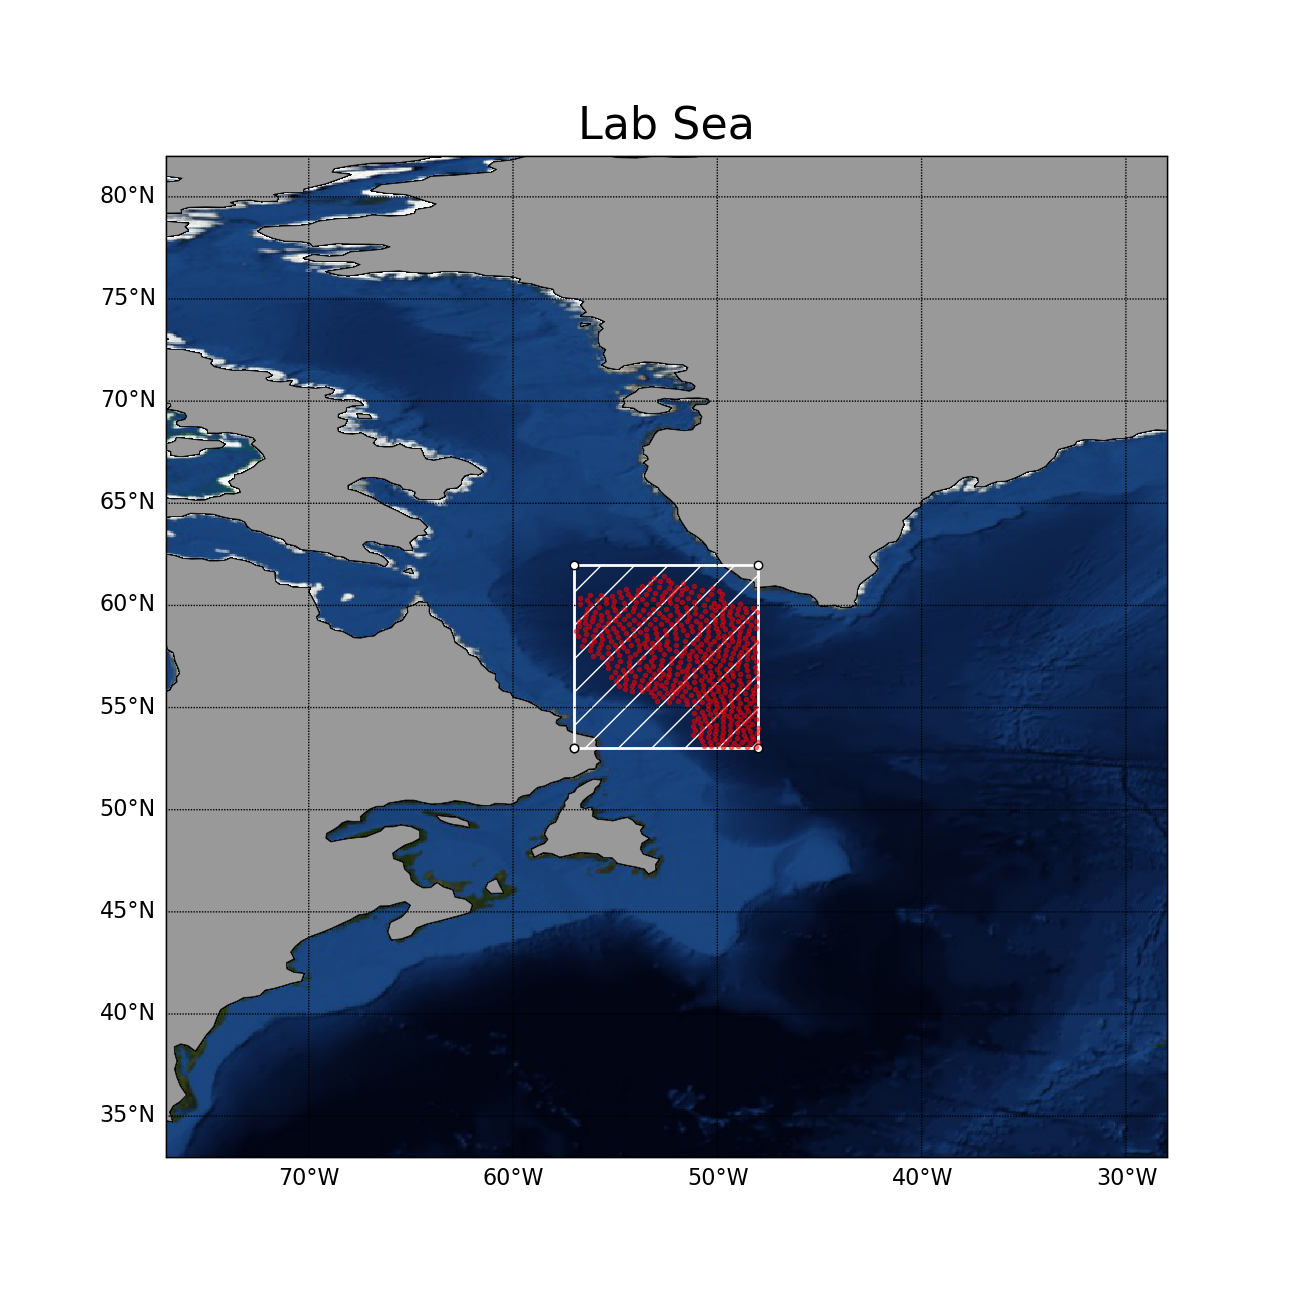

In [38]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                           *** ANALYSE BOX ***                               |
#|                                                                             |
#+_____________________________________________________________________________+
# analyse selected box, which points are inside box
print(' --> calculate points inside box')
print(box.box_define)
box.select_pointsinbox(mesh)
if do_anomaly==True:
    box2.box_idx = box.box_idx
box.plot_index_position(mesh)    

     --> ../results/new_linfs/cvmix_kpp_mom6/t11sw1_mtchparabolic/
     --> salt


/home/ollie/pscholz/fesom2.0_git/view_pscholz/sub_fesom_data.py:635: RuntimeWarning: Mean of empty slice
  ncval2 = np.nanmean(ncval[:,np.where(data.box_idx[ii][0:mesh.n2dn])[0],:],axis=1)


<IPython.core.display.Javascript object>


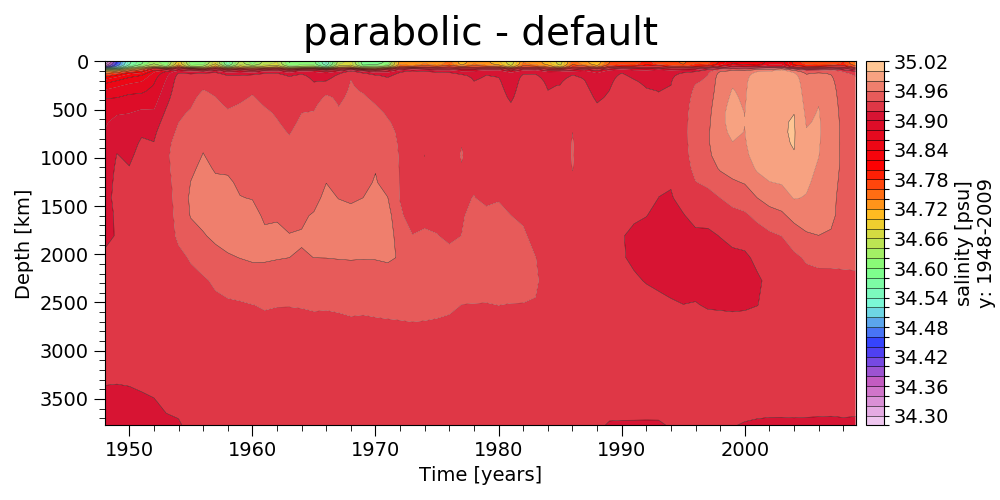

/home/ollie/pscholz/fesom2.0_git/view_pscholz/sub_fesom_selectbox.py:548: RuntimeWarning: invalid value encountered in less
  data_plot[data_plot<clevel[0]]  = clevel[0]+np.finfo(np.float32).eps
/home/ollie/pscholz/fesom2.0_git/view_pscholz/sub_fesom_selectbox.py:549: RuntimeWarning: invalid value encountered in greater
  data_plot[data_plot>clevel[-1]] = clevel[-1]-np.finfo(np.float32).eps


finish


In [35]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# load fesom2.0 data over time and depth --> average over points in box 
fesom_load_data_overtime(mesh,box,do_output=False)
if do_anomaly==True:
    fesom_load_data_overtime(mesh,box2,do_output=False)
    anom = cp.deepcopy(box)
    anom.data_anom(box2,box)

#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** PLOT FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
if do_anomaly==False:
    cmax = np.max([np.nanmax(box.value)])
    cmin = np.min([np.nanmin(box.value)])
    if cmax!=0.0: cmax = np.around(cmax, -np.int32(np.floor(np.log10(np.abs(cmax)))-2) ) 
    if cmin!=0.0: cmin = np.around(cmin, -np.int32(np.floor(np.log10(np.abs(cmin)))-2) ) 
    cref = cmin + (cmax-cmin)/2
    cref = np.around(cref, -np.int32(np.floor(np.log10(np.abs(cref)))-2) ) 
    box.cmap = 'odv'
    box.crange=[cmin,cmax,cref]	
    fig2,ax,cax = box.plot_index_t_x_z(do_output=False)
    
if do_anomaly==True:
    #___________________________________________________________________________
    # do common crange for line and lin2
    cmax = np.max([np.nanmax(box.value),np.nanmax(box2.value)])
    cmin = np.min([np.nanmin(box.value),np.nanmin(box2.value)])
    if cmax!=0.0: cmax = np.around(cmax, -np.int32(np.floor(np.log10(np.abs(cmax)))-2) ) 
    if cmin!=0.0: cmin = np.around(cmin, -np.int32(np.floor(np.log10(np.abs(cmin)))-2) ) 
    cref = cmin + (cmax-cmin)/2
    cref = np.around(cref, -np.int32(np.floor(np.log10(np.abs(cref)))-2) ) 
    box.crange=[cmin,cmax,cref]	
    box2.crange=[cmin,cmax,cref]
    
	#___________________________________________________________________________
    fig2,ax,cax = box.plot_index_t_x_z(do_output=False)
    fig2,ax,cax = box2.plot_index_t_x_z(do_output=False)
    fig2,ax,cax = anom.plot_index_t_x_z(do_output=False)